<h1> CLASSIFICATION </h1>

<h2>DATASET </h2>

<h3>Creating Dataset/Dataframe </h3>

In [1]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=10000, n_features=9, n_informative=4, class_sep=2, random_state=18)

In [2]:
import pandas as pd
df=pd.DataFrame(X,columns=["a","b","c","d","e","f","g","h","i"])
df["Class"]=y
df.head()

,a,b,c,d,e,f,g,h,i,Class
0,3.290489,-0.411827,-0.600695,-4.250619,-0.209376,1.019036,-5.717909,-0.179226,-0.914161,0
1,-0.543413,-3.782512,0.390637,0.023942,2.010453,1.185315,1.218147,0.007708,-0.957374,0
2,-2.697898,-3.862467,-0.407272,-0.704430,2.803621,2.080082,1.416647,0.583622,1.332092,1
3,1.051777,-3.129374,-0.499094,0.575599,-0.894801,1.997441,1.938695,-0.113648,0.882476,0
4,2.913780,2.582148,-1.755320,-2.224739,-5.067421,2.062468,-2.614919,-1.154300,0.303457,0


<h3>To learn more about dataset: </h3>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       10000 non-null  float64
 1   b       10000 non-null  float64
 2   c       10000 non-null  float64
 3   d       10000 non-null  float64
 4   e       10000 non-null  float64
 5   f       10000 non-null  float64
 6   g       10000 non-null  float64
 7   h       10000 non-null  float64
 8   i       10000 non-null  float64
 9   Class   10000 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 781.4 KB


In [4]:
df.describe()

,a,b,c,d,e,f,g,h,i,Class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.000742,-1.002711,0.001397,-1.018837,-0.984852,2.015345,0.000921,0.008026,0.004308,0.500400
std,2.393360,2.156767,1.007745,1.785009,3.711534,1.316801,2.213916,0.999628,0.994603,0.500025
min,-6.710074,-6.880651,-3.548938,-6.317542,-16.711622,-2.791869,-6.808080,-3.714038,-3.633721,0.000000
25%,-1.981640,-2.491544,-0.688496,-2.381084,-3.393934,1.151817,-1.991508,-0.664733,-0.670409,0.000000
50%,-0.078133,-1.520075,-0.010870,-1.197160,-0.401644,2.005485,0.206321,-0.002433,-0.004627,1.000000
75%,1.994817,0.144942,0.692158,0.665134,1.467977,2.886579,1.999211,0.675401,0.680110,1.000000
max,8.235676,7.081111,3.738392,3.778696,11.731977,6.911073,4.997483,3.995229,3.845220,1.000000


<h2> DATA VISUALIZATION </h2>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


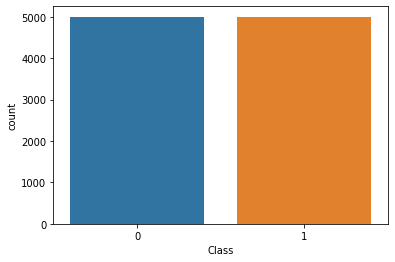

In [5]:
import seaborn as sns
sns.countplot(df.Class)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


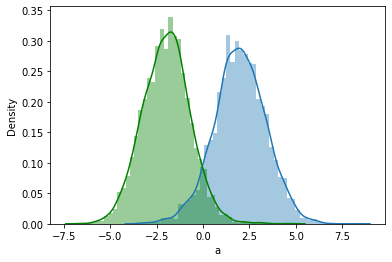

In [6]:
sns.distplot(df[df.Class == 0].a)
sns.distplot(df[df.Class == 1].a, color="g")

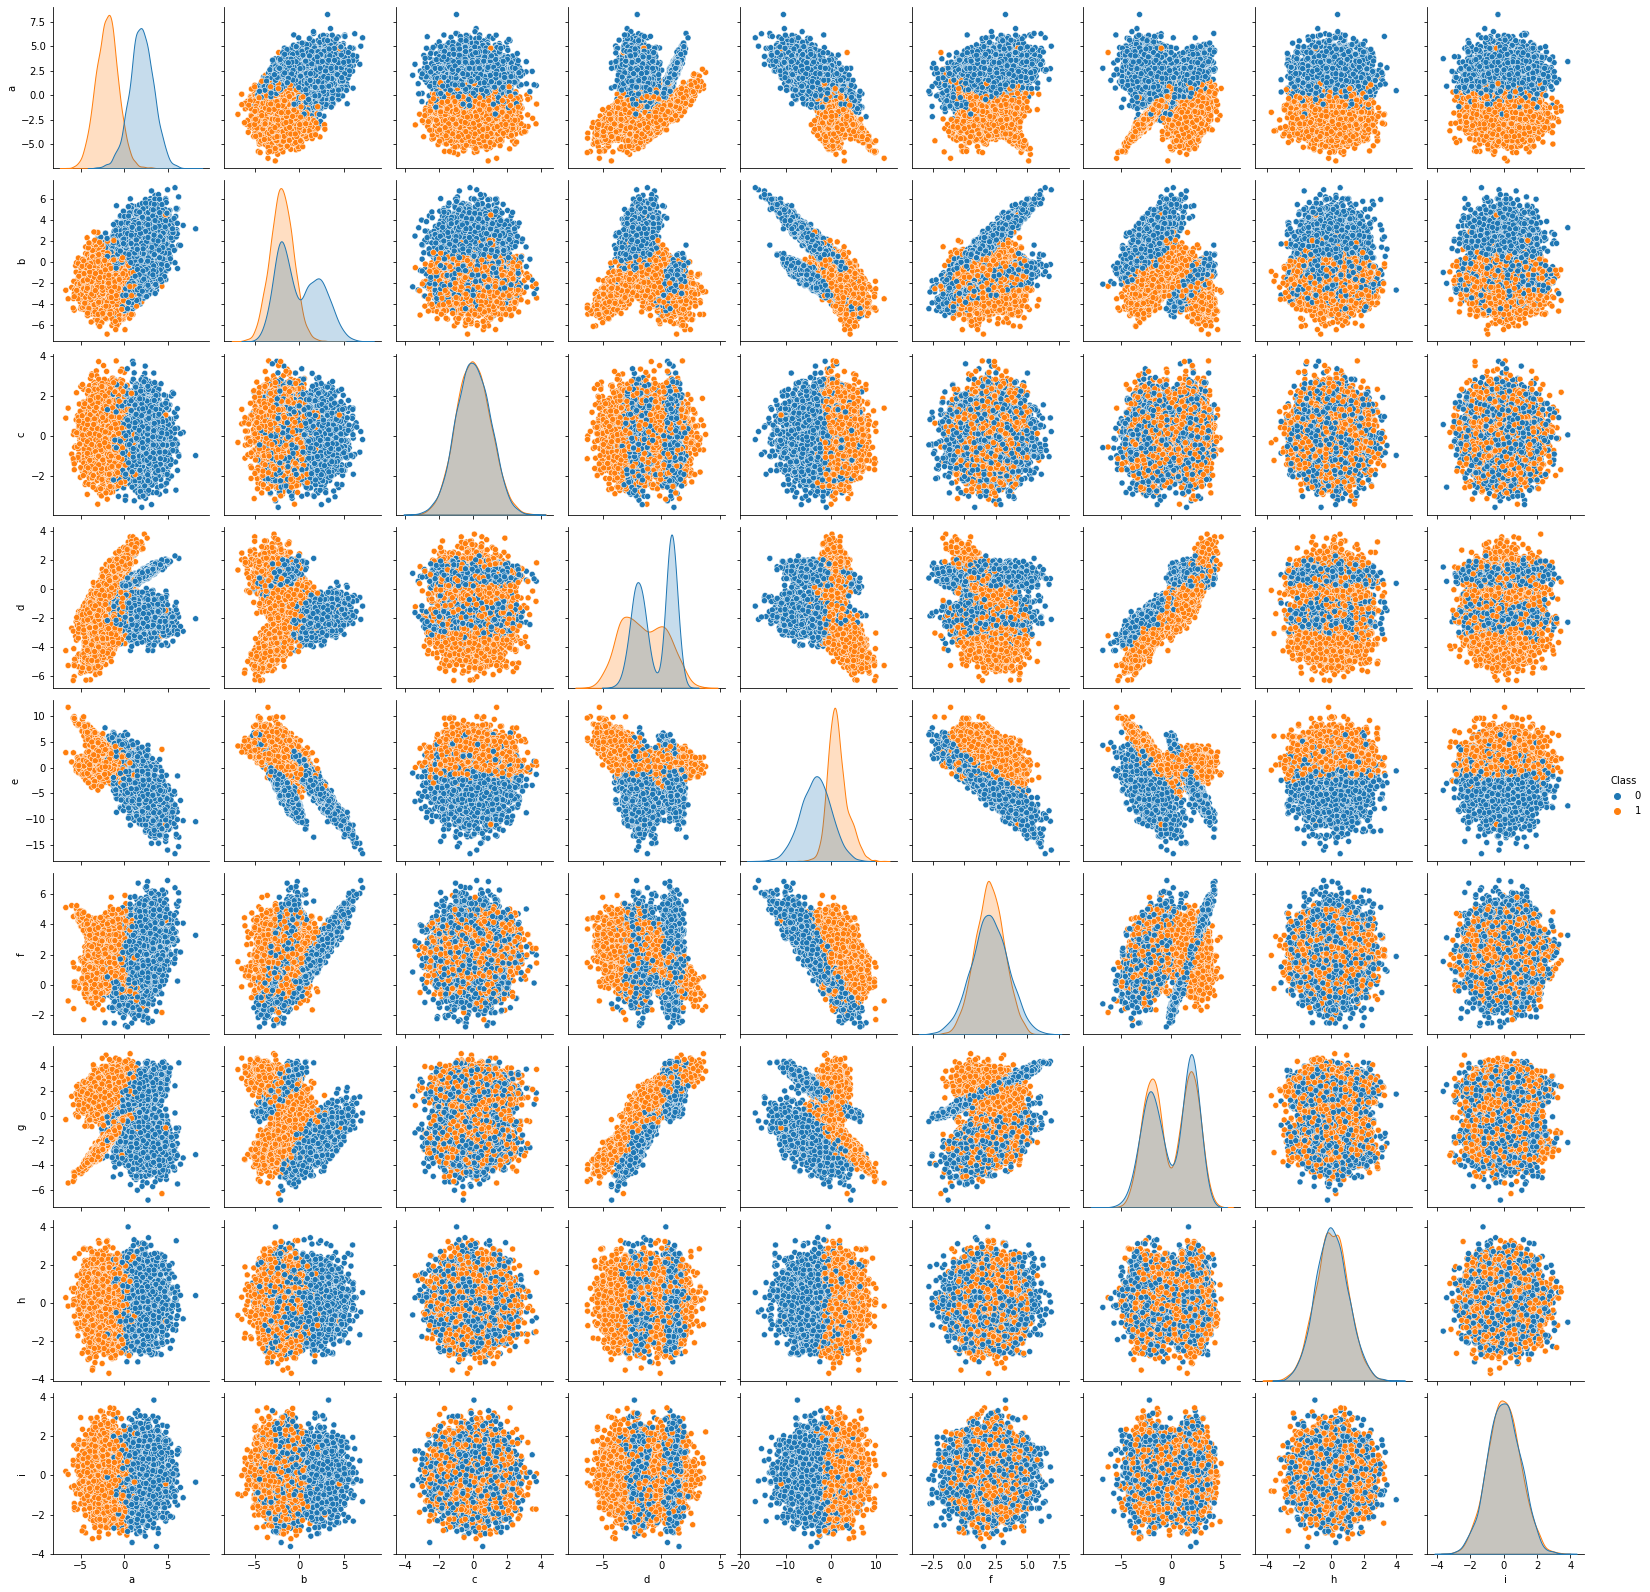

In [7]:
sns.pairplot(df,hue="Class")

<h2> PREPROCESSING </h2>

<h3>Checking Imbalance </h3>
There is not any imbalance problem.

In [8]:
df.Class.value_counts()

1    5004
0    4996
Name: Class, dtype: int64

In [9]:
df.groupby("Class").count()

,a,b,c,d,e,f,g,h,i
Class,,,,,,,,,
0,4996,4996,4996,4996,4996,4996,4996,4996,4996
1,5004,5004,5004,5004,5004,5004,5004,5004,5004


<h3> Checking missing values </h3>
There are no missing values in the dataframe

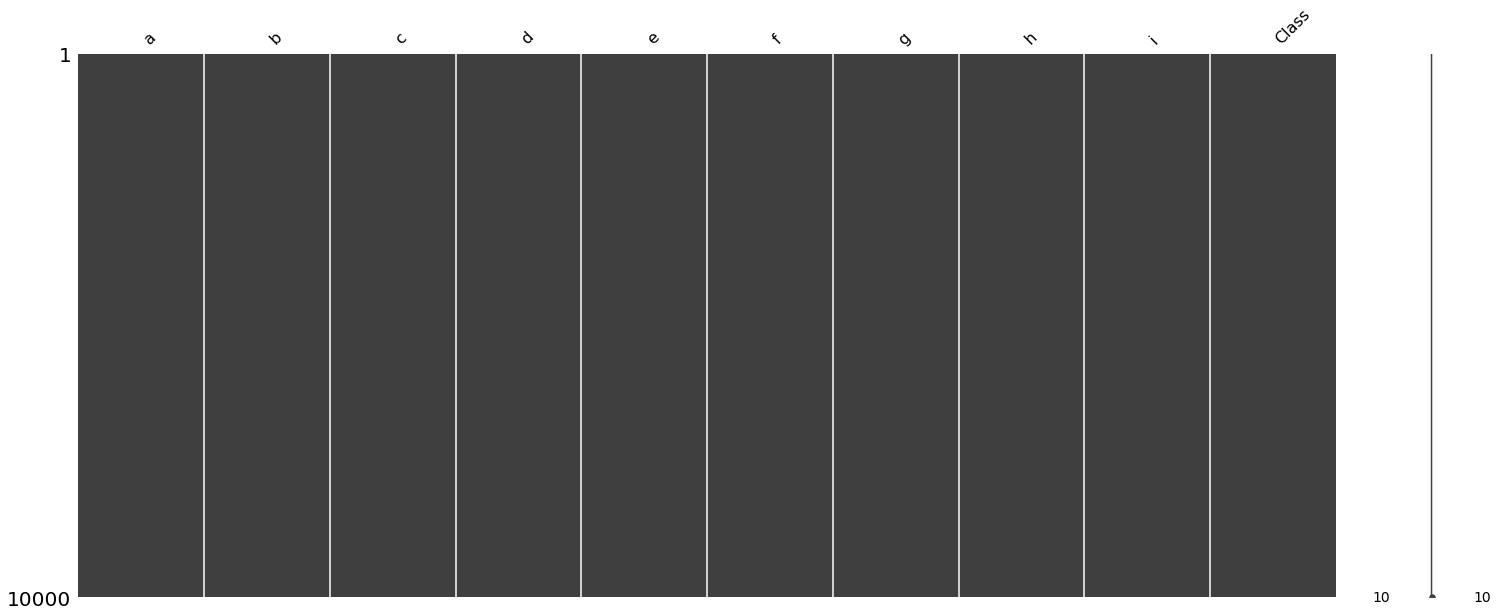

In [10]:
import missingno as msno
msno.matrix(df)

In [11]:
df.isna().sum()

a        0
b        0
c        0
d        0
e        0
f        0
g        0
h        0
i        0
Class    0
dtype: int64

<h3> Checking duplicated values </h3>
There are no duplicated values in dataframe

In [12]:
df.duplicated().sum()

0

<h3> Checking outliers with Z-Score</h3>
There are 133 outliers in data. I will drop them.


In [13]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)
outliers = list(set(np.where(z > 3)[0]))

[[1.37460000e+00 2.73980971e-01 5.97494434e-01 ... 1.87330912e-01
  9.23499405e-01 1.00080032e+00]
 [2.27371474e-01 1.28893863e+00 3.86268584e-01 ... 3.17348275e-04
  9.66949227e-01 1.00080032e+00]
 [1.12760931e+00 1.32601221e+00 4.05548411e-01 ... 5.75839586e-01
  1.33505557e+00 9.99200320e-01]
 ...
 [2.32534613e+00 1.93109732e+00 4.09221094e-01 ... 1.48363838e-01
  7.17151541e-01 1.00080032e+00]
 [1.38430989e+00 7.99421934e-01 1.62607608e+00 ... 8.29761668e-01
  1.49510354e+00 9.99200320e-01]
 [3.43335306e-01 1.64811453e+00 1.25661632e+00 ... 9.19194711e-01
  2.68552466e-01 1.00080032e+00]]


In [14]:
len(outliers)

133

In [15]:
#Removing Outliers
df = df.drop(outliers,axis = 0).reset_index(drop = True)
display(df)

,a,b,c,d,e,f,g,h,i,Class
0,3.290489,-0.411827,-0.600695,-4.250619,-0.209376,1.019036,-5.717909,-0.179226,-0.914161,0
1,-0.543413,-3.782512,0.390637,0.023942,2.010453,1.185315,1.218147,0.007708,-0.957374,0
2,-2.697898,-3.862467,-0.407272,-0.704430,2.803621,2.080082,1.416647,0.583622,1.332092,1
3,1.051777,-3.129374,-0.499094,0.575599,-0.894801,1.997441,1.938695,-0.113648,0.882476,0
4,2.913780,2.582148,-1.755320,-2.224739,-5.067421,2.062468,-2.614919,-1.154300,0.303457,0
...,...,...,...,...,...,...,...,...,...,...
9862,2.748612,2.334336,-0.215422,-0.743142,-5.163866,1.608074,-0.916196,-0.322332,2.451602,0
9863,3.309771,-1.234190,-0.049615,1.360582,-5.364357,2.779653,2.658484,0.584260,0.241696,0
9864,5.565853,3.162008,-0.410973,-1.933915,-8.630947,3.057350,-2.399711,-0.140276,0.717553,0
9865,-3.312244,-2.726791,-1.637191,-1.164315,1.346862,3.053202,1.490092,0.837437,1.491268,1


<h3> Checking correlated features </h3>

In [16]:
df.corr()

,a,b,c,d,e,f,g,h,i,Class
a,1.000000,0.469237,-0.014325,0.371653,-0.781944,0.050684,0.075510,-0.003767,-0.003911,-0.827608
b,0.469237,1.000000,-0.007209,-0.199178,-0.717159,0.232370,-0.342064,-0.002594,0.003515,-0.460730
c,-0.014325,-0.007209,1.000000,-0.004614,0.003143,0.017773,0.006263,0.002252,-0.000559,0.001240
d,0.371653,-0.199178,-0.004614,1.000000,-0.313691,-0.146036,0.897191,-0.013639,-0.008372,-0.271291
e,-0.781944,-0.717159,0.003143,-0.313691,1.000000,-0.523125,-0.226668,0.013904,0.007373,0.651109
f,0.050684,0.232370,0.017773,-0.146036,-0.523125,1.000000,0.169431,-0.015390,-0.010966,0.002958
g,0.075510,-0.342064,0.006263,0.897191,-0.226668,0.169431,1.000000,-0.018362,-0.011751,-0.002958
h,-0.003767,-0.002594,0.002252,-0.013639,0.013904,-0.015390,-0.018362,1.000000,-0.007739,-0.000036
i,-0.003911,0.003515,-0.000559,-0.008372,0.007373,-0.010966,-0.011751,-0.007739,1.000000,-0.000057
Class,-0.827608,-0.460730,0.001240,-0.271291,0.651109,0.002958,-0.002958,-0.000036,-0.000057,1.000000


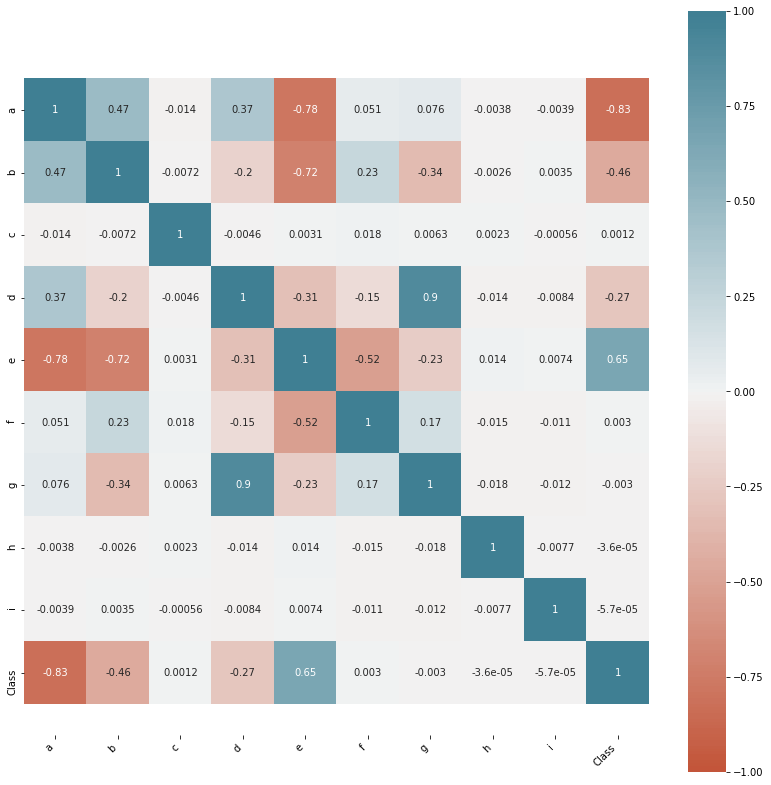

In [17]:
#To see better visualization of correlation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    df.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(df.corr())+0.5, -0.5);

<h3>Creating input/output </h3>

In [18]:
X=df.drop("Class",axis=1)
y=df[["Class"]]

In [19]:
X.head(3)

,a,b,c,d,e,f,g,h,i
0,3.290489,-0.411827,-0.600695,-4.250619,-0.209376,1.019036,-5.717909,-0.179226,-0.914161
1,-0.543413,-3.782512,0.390637,0.023942,2.010453,1.185315,1.218147,0.007708,-0.957374
2,-2.697898,-3.862467,-0.407272,-0.704430,2.803621,2.080082,1.416647,0.583622,1.332092


In [20]:
y.head(3)

,Class
0,0
1,0
2,1


<h3>Dividing dataset into train and test </h3>
Splitting as 0.7 train - 0.3 test ratio

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6906, 9)
(6906, 1)
(2961, 9)
(2961, 1)


<h2>MODEL SELECTION </h2>

<h3> Logistic Regression </h3>

In [22]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred_log_reg=log_reg.predict(X_test)
print("train:",log_reg.score(X_train,y_train))
print("test:",log_reg.score(X_test,y_test))

train: 0.9433825658847379
test: 0.9388720027017899


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred_log_reg,y_test))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1457
           1       0.93      0.95      0.94      1504

    accuracy                           0.94      2961
   macro avg       0.94      0.94      0.94      2961
weighted avg       0.94      0.94      0.94      2961



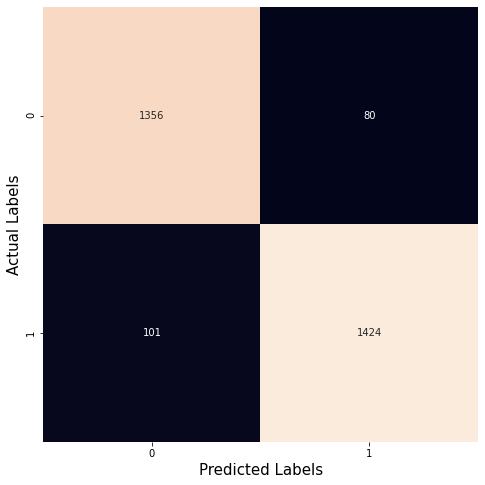

In [24]:
# Confusion Matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test,y_pred_log_reg)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False,fmt='g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('Actual Labels',fontsize = 15)
plt.show()

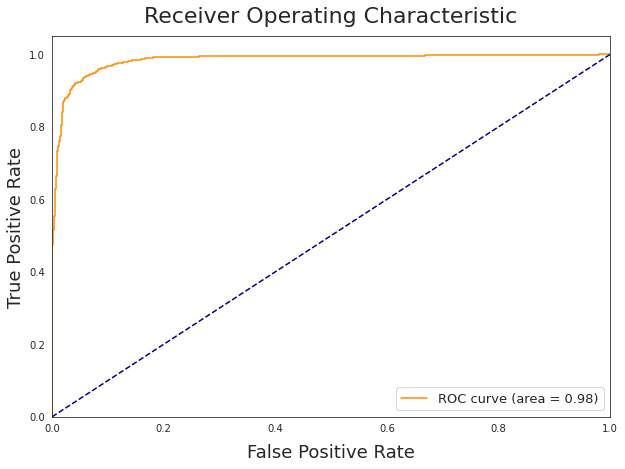

In [25]:
from sklearn.metrics import roc_curve, auc
y_pred_prop = log_reg.predict_proba(X_test)[:,1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prop)
roc_auc_log = auc(fpr_log, tpr_log)

sns.set_style("white")
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=18,labelpad =10)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Receiver Operating Characteristic',fontsize=22).set_position([.5, 1.02])
plt.legend(loc="lower right",fontsize=13)
plt.show()


<h2>Decision Tree </h2>

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid={"max_depth":list(range(3,11)),"max_features":list(range(1,11)),"min_samples_leaf":list(range(1,11)),"criterion":["gini","entropy"]}

dec=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5,n_jobs = -1)
dec.fit(X_train,y_train)
y_pred_dec=dec.predict(X_test)

print("Tuned parameters: ",dec.best_params_)
print("Mean of the cv scores is: ",dec.best_score_)
print("Train Score: ",dec.score(X_train,y_train))
print("Test Score: ",dec.score(X_test,y_test))


Tuned parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 7, 'min_samples_leaf': 4}
Mean of the cv scores is:  0.9817548683759645
Train Score:  0.9900086880973067
Test Score:  0.9821006416751098


In [27]:
print(classification_report(y_pred_dec,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1441
           1       0.98      0.98      0.98      1520

    accuracy                           0.98      2961
   macro avg       0.98      0.98      0.98      2961
weighted avg       0.98      0.98      0.98      2961



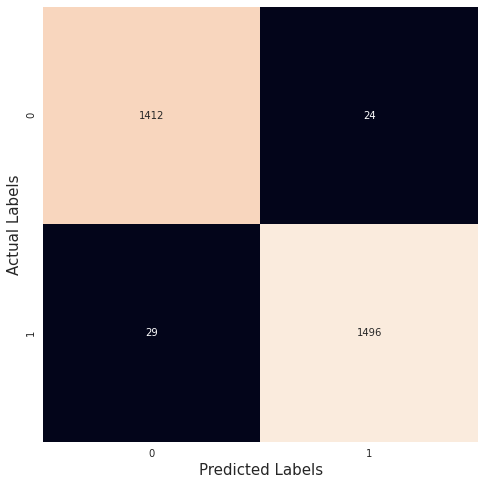

In [28]:
# Confusion Matrix
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test,y_pred_dec)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False,fmt='g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('Actual Labels',fontsize = 15)
plt.show()

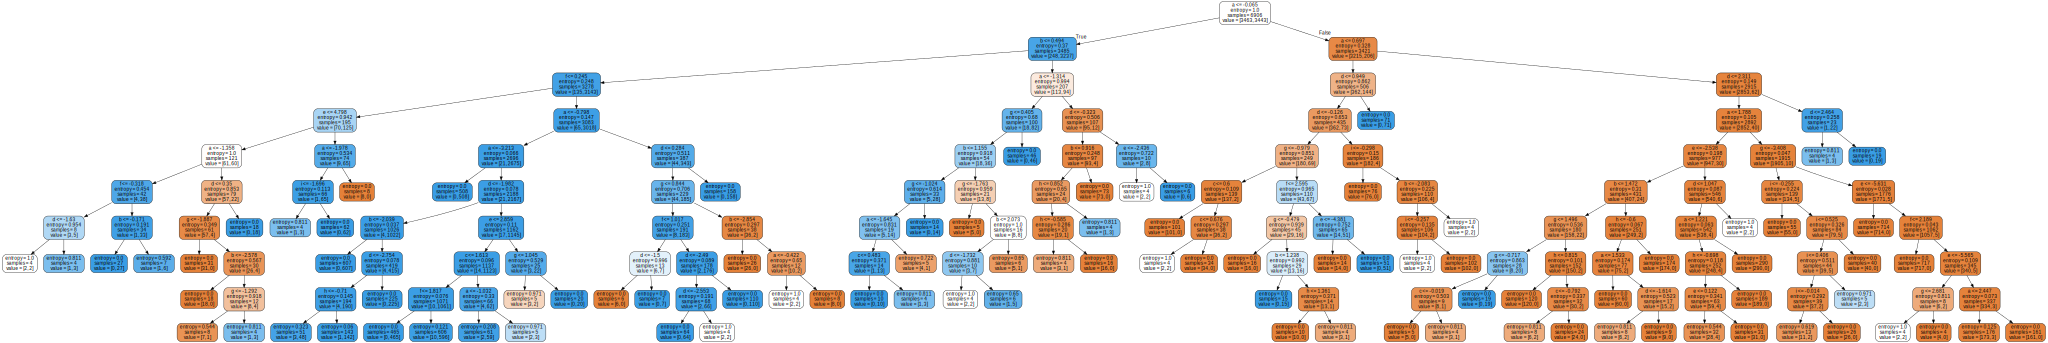

In [29]:
#Visualization
import graphviz
import os
from sklearn.tree import export_graphviz
# We need to locate graphiz directory for visualization
os.environ["PATH"] += ';' + r'C:\Users\yyagm'
dot_data = export_graphviz(dec.best_estimator_, out_file=None,
                     feature_names=X.columns,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

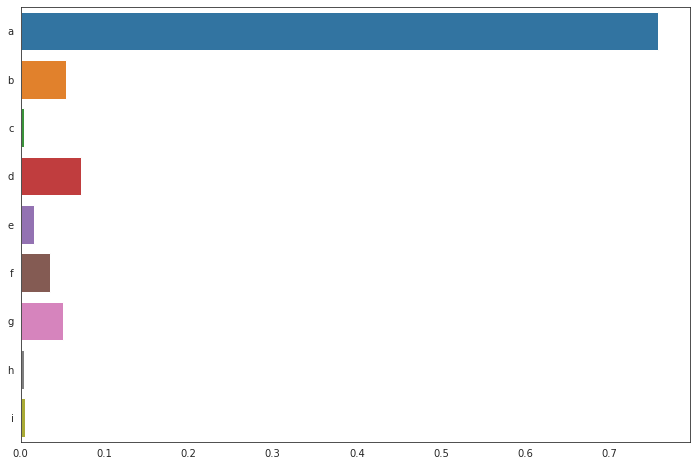

In [30]:
#Feature Importance
plt.figure(figsize=(12, 8))
importance = dec.best_estimator_.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

<h2> XGBOOST </h2>

In [31]:
from xgboost.sklearn import XGBClassifier

params={'max_depth':range(4,10),
    'min_child_weight':range(4,10),
    'learning_rate': [0.05,0.1,0.2],
    'n_estimators': [100,200,500] }

xgb=GridSearchCV(XGBClassifier(),params,cv=5,n_jobs=-1)
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)

print("\nTuned Parameters: ",xgb.best_params_)
print("Mean cv scores: ",xgb.best_score_)
print("Train Score: ",xgb.score(X_train,y_train))
print("Test Score: ",xgb.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Tuned Parameters:  {'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 100}
Mean cv scores:  0.9868232399391786
Train Score:  0.9933391253982045
Test Score:  0.9888551165146909


In [32]:
print(classification_report(y_pred_xgb,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1429
           1       0.99      0.99      0.99      1532

    accuracy                           0.99      2961
   macro avg       0.99      0.99      0.99      2961
weighted avg       0.99      0.99      0.99      2961



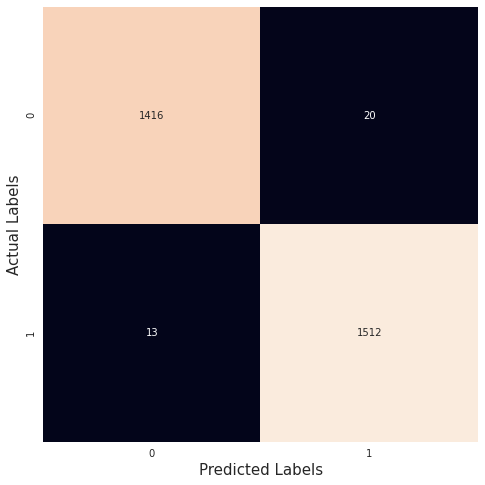

In [33]:
# Confusion Matrix
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test,y_pred_xgb)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False,fmt='g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('Actual Labels',fontsize = 15)
plt.show()

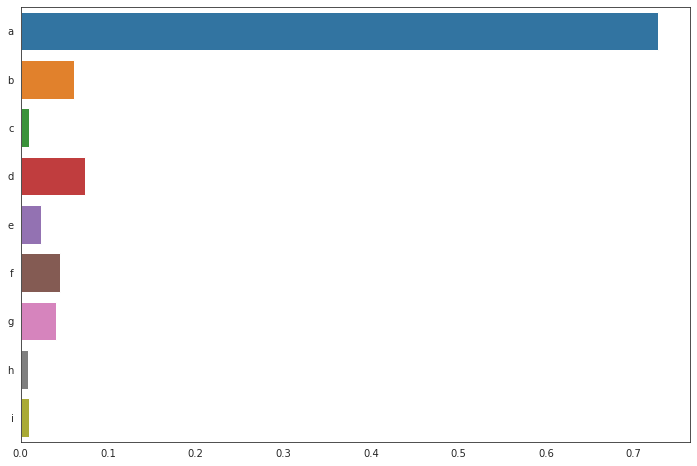

In [34]:
#Feature Importance
plt.figure(figsize=(12, 8))
importance = xgb.best_estimator_.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

<h2> RESULT </h2>

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

train = [log_reg.score(X_train,y_train), dec.score(X_train,y_train), xgb.score(X_train,y_train)]
test = [log_reg.score(X_test,y_test), dec.score(X_test,y_test), xgb.score(X_test,y_test)]
precision = [precision_score(y_test, y_pred_log_reg), precision_score(y_test, y_pred_dec), precision_score(y_test, y_pred_xgb)]
recall = [recall_score(y_test, y_pred_log_reg), recall_score(y_test, y_pred_dec), recall_score(y_test, y_pred_xgb) ]
f1 = [f1_score(y_test, y_pred_log_reg), f1_score(y_test, y_pred_dec), f1_score(y_test, y_pred_xgb)]
model = ["Logistic Regression","Decision Tree","XGBoost"]

In [36]:
scores = pd.DataFrame({"Model Name":model,"Train Score":train,"Test Score":test,"Precision":precision,"Recall":recall,"F1 Score":f1})
scores

,Model Name,Train Score,Test Score,Precision,Recall,F1 Score
0,Logistic Regression,0.943383,0.938872,0.946809,0.933770,0.940244
1,Decision Tree,0.990009,0.982101,0.984211,0.980984,0.982594
2,XGBoost,0.993339,0.988855,0.986945,0.991475,0.989205


XGBOOST performs better.